<a href="https://colab.research.google.com/github/Susreesha/ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Health_insurance (2).csv")

In [ ]:
df.head()

,pid,age,sex,bmi,children,smoker,region,diabetes,heart rate,Creatinine,glucose,charges
0,1,19.0,Female,27.900,0,yes,southwest,1,68.837838,1.958333,114.636364,16884.92400
1,2,18.0,male,33.770,1,no,southeast,0,101.370370,1.122222,147.500000,NaN
2,3,28.0,mal,33.000,3,no,southeast,0,72.318182,1.871429,149.000000,4449.46200
3,4,33.0,male,22.705,0,no,northwest,0,94.500000,0.585714,128.250000,21984.47061
4,5,32.0,NaN,28.880,0,no,northwest,0,67.920000,1.950000,145.750000,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178 entries, 0 to 1177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pid         1178 non-null   int64  
 1   age         1177 non-null   float64
 2   sex         1176 non-null   object 
 3   bmi         1175 non-null   float64
 4   children    1178 non-null   int64  
 5   smoker      1178 non-null   object 
 6   region      1178 non-null   object 
 7   diabetes    1178 non-null   int64  
 8   heart rate  1165 non-null   float64
 9   Creatinine  1178 non-null   float64
 10  glucose     1160 non-null   float64
 11  charges     1174 non-null   float64
dtypes: float64(6), int64(3), object(3)
memory usage: 110.6+ KB


**Drop Duplicates**

In [ ]:
df = df.drop_duplicates(subset = ["pid"])
df

,pid,age,sex,bmi,children,smoker,region,diabetes,heart rate,Creatinine,glucose,charges
0,1,19.0,Female,27.900,0,yes,southwest,1,68.837838,1.958333,114.636364,16884.92400
1,2,18.0,male,33.770,1,no,southeast,0,101.370370,1.122222,147.500000,NaN
2,3,28.0,mal,33.000,3,no,southeast,0,72.318182,1.871429,149.000000,4449.46200
3,4,33.0,male,22.705,0,no,northwest,0,94.500000,0.585714,128.250000,21984.47061
4,5,32.0,NaN,28.880,0,no,northwest,0,67.920000,1.950000,145.750000,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1173,56.0,female,41.910,0,no,southeast,1,100.125000,8.385714,120.000000,11093.62290
1174,1174,38.0,male,29.260,2,no,northwest,1,114.640000,1.900000,138.333333,6457.84340
1175,1175,29.0,male,32.110,2,no,northwest,1,52.720000,2.728571,99.000000,4433.91590
1176,1176,22.0,female,27.100,0,no,southwest,1,93.400000,1.736364,135.166667,2154.36100


**Number of Null Values**

In [ ]:
df.isnull().sum()

,0
pid,0
age,1
sex,2
bmi,3
children,0
smoker,0
region,0
diabetes,0
heart rate,13
Creatinine,0


In [ ]:
df.columns

Index(['pid', 'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'diabetes',
       'heart rate', 'Creatinine', 'glucose', 'charges'],
      dtype='object')

**REMOVE OUTLIERS**

In [ ]:
import numpy as np
for i in df.select_dtypes(include=np.number).columns:

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

**REPLACING NULL VALUES**

In [ ]:
for i in ['age', 'bmi', 'heart rate', 'Creatinine', 'glucose']:
  df[i].fillna(df[i].mean(), inplace = True)

<ipython-input-281-b93f66d83950>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace = True)


**REOING OUTPUT NULL ALUES**

In [ ]:
df = df.dropna(subset=['charges'])
df

,pid,age,sex,bmi,children,smoker,region,diabetes,heart rate,Creatinine,glucose,charges
0,1,19.0,Female,27.900,0,yes,southwest,1,68.837838,1.958333,114.636364,16884.92400
2,3,28.0,mal,33.000,3,no,southeast,0,72.318182,1.871429,149.000000,4449.46200
3,4,33.0,male,22.705,0,no,northwest,0,94.500000,0.585714,128.250000,21984.47061
4,5,32.0,NaN,28.880,0,no,northwest,0,67.920000,1.950000,145.750000,3866.85520
5,6,31.0,female,25.740,0,no,southeast,0,74.181818,1.612500,98.333333,3756.62160
...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1170,37.0,female,34.105,1,no,northwest,1,110.166667,0.840000,143.285714,6112.35295
1171,1171,18.0,male,27.360,1,yes,northeast,0,110.478261,1.275000,87.000000,17178.68240
1174,1174,38.0,male,29.260,2,no,northwest,1,114.640000,1.900000,138.333333,6457.84340
1175,1175,29.0,male,32.110,2,no,northwest,1,52.720000,2.728571,99.000000,4433.91590


**Clean Categorical Columns**

In [ ]:
category_cols = df.select_dtypes(include="object").columns

for col in category_cols:
 print(df[col].unique())

['Female' 'mal' 'male' nan 'female']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


**REPLACING NULL VALUES IN CATEGORICAL COLUMNS**

In [ ]:
df['sex'].fillna(df['sex'].mode()[0], inplace = True)
df['sex'] = df['sex'].replace({'mal': 'male','female': 'Female'})

<ipython-input-284-c6fa99a14b88>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].fillna(df['sex'].mode()[0], inplace = True)


**DUMMIES**

In [ ]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

In [ ]:
df

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_Female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,19.0,27.900,0,1,68.837838,1.958333,114.636364,16884.92400,True,False,False,True,False,False,False,True
2,3,28.0,33.000,3,0,72.318182,1.871429,149.000000,4449.46200,False,True,True,False,False,False,True,False
3,4,33.0,22.705,0,0,94.500000,0.585714,128.250000,21984.47061,False,True,True,False,False,True,False,False
4,5,32.0,28.880,0,0,67.920000,1.950000,145.750000,3866.85520,False,True,True,False,False,True,False,False
5,6,31.0,25.740,0,0,74.181818,1.612500,98.333333,3756.62160,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170,1170,37.0,34.105,1,1,110.166667,0.840000,143.285714,6112.35295,True,False,True,False,False,True,False,False
1171,1171,18.0,27.360,1,0,110.478261,1.275000,87.000000,17178.68240,False,True,False,True,True,False,False,False
1174,1174,38.0,29.260,2,1,114.640000,1.900000,138.333333,6457.84340,False,True,True,False,False,True,False,False
1175,1175,29.0,32.110,2,1,52.720000,2.728571,99.000000,4433.91590,False,True,True,False,False,True,False,False


**NORMALIZATION**

In [ ]:
#normalize numerial columns
min_max_values = {}

cols = ['age', 'bmi', 'heart rate', 'Creatinine', 'glucose']

for i in cols:
    min_val = df[i].min()
    max_val = df[i].max()
    df[i] = (df[i] - min_val) / (max_val - min_val)
    min_max_values[i] = (min_val, max_val)

In [ ]:
min_max_values['age'][0]

18.0

**SAVING TO A JSON FILE**

In [ ]:
import json
with open('min_max_values.json', 'w') as json_file:
    json.dump(min_max_values, json_file)

In [ ]:
df.head()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_Female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0.021739,0.378327,0,1,0.328677,0.555657,0.248969,16884.92400,True,False,False,True,False,False,False,True
2,3,0.217391,0.539924,3,0,0.367433,0.527112,0.436851,4449.46200,False,True,True,False,False,False,True,False
3,4,0.326087,0.213720,0,0,0.614436,0.104797,0.323401,21984.47061,False,True,True,False,False,True,False,False
4,5,0.304348,0.409379,0,0,0.318457,0.552920,0.419081,3866.85520,False,True,True,False,False,True,False,False
5,6,0.282609,0.309886,0,0,0.388185,0.442062,0.159832,3756.62160,True,False,True,False,False,False,True,False


**CORRELATION**

In [ ]:
df.corr()

,pid,age,bmi,children,diabetes,heart rate,Creatinine,glucose,charges,sex_Female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
pid,1.000000,0.022766,-0.006281,0.015532,0.047132,0.065919,0.041176,0.054753,0.016326,-0.036445,0.036445,0.011113,-0.011113,0.014269,0.020061,-0.042108,0.008099
age,0.022766,1.000000,0.128538,0.029483,0.099132,-0.028315,0.029353,0.056884,0.398162,0.049710,-0.049710,0.085711,-0.085711,-0.001406,0.003429,-0.016054,0.014066
bmi,-0.006281,0.128538,1.000000,-0.003137,-0.036752,-0.054100,0.060059,-0.010681,-0.062230,-0.027367,0.027367,0.259813,-0.259813,-0.117858,-0.122109,0.239410,-0.001717
children,0.015532,0.029483,-0.003137,1.000000,-0.020376,-0.045857,0.030975,0.007623,0.052051,0.012224,-0.012224,-0.002326,0.002326,-0.015702,0.015238,-0.012630,0.012965
diabetes,0.047132,0.099132,-0.036752,-0.020376,1.000000,-0.141843,0.142797,0.321035,0.020131,0.004387,-0.004387,0.010703,-0.010703,0.026009,0.011567,-0.010164,-0.027056
heart rate,0.065919,-0.028315,-0.054100,-0.045857,-0.141843,1.000000,-0.194493,-0.024665,-0.004745,0.016162,-0.016162,-0.034387,0.034387,0.040259,-0.077307,0.068628,-0.031413
Creatinine,0.041176,0.029353,0.060059,0.030975,0.142797,-0.194493,1.000000,0.044696,0.048962,-0.009703,0.009703,0.026128,-0.026128,-0.037106,-0.016145,0.062119,-0.009514
glucose,0.054753,0.056884,-0.010681,0.007623,0.321035,-0.024665,0.044696,1.000000,-0.009182,-0.072531,0.072531,0.059436,-0.059436,0.019997,-0.005404,-0.003984,-0.010367
charges,0.016326,0.398162,-0.062230,0.052051,0.020131,-0.004745,0.048962,-0.009182,1.000000,0.018842,-0.018842,-0.602182,0.602182,0.071474,0.022672,-0.035565,-0.057593
sex_Female,-0.036445,0.049710,-0.027367,0.012224,0.004387,0.016162,-0.009703,-0.072531,0.018842,1.000000,-1.000000,0.024998,-0.024998,-0.017477,0.010844,0.008301,-0.001884


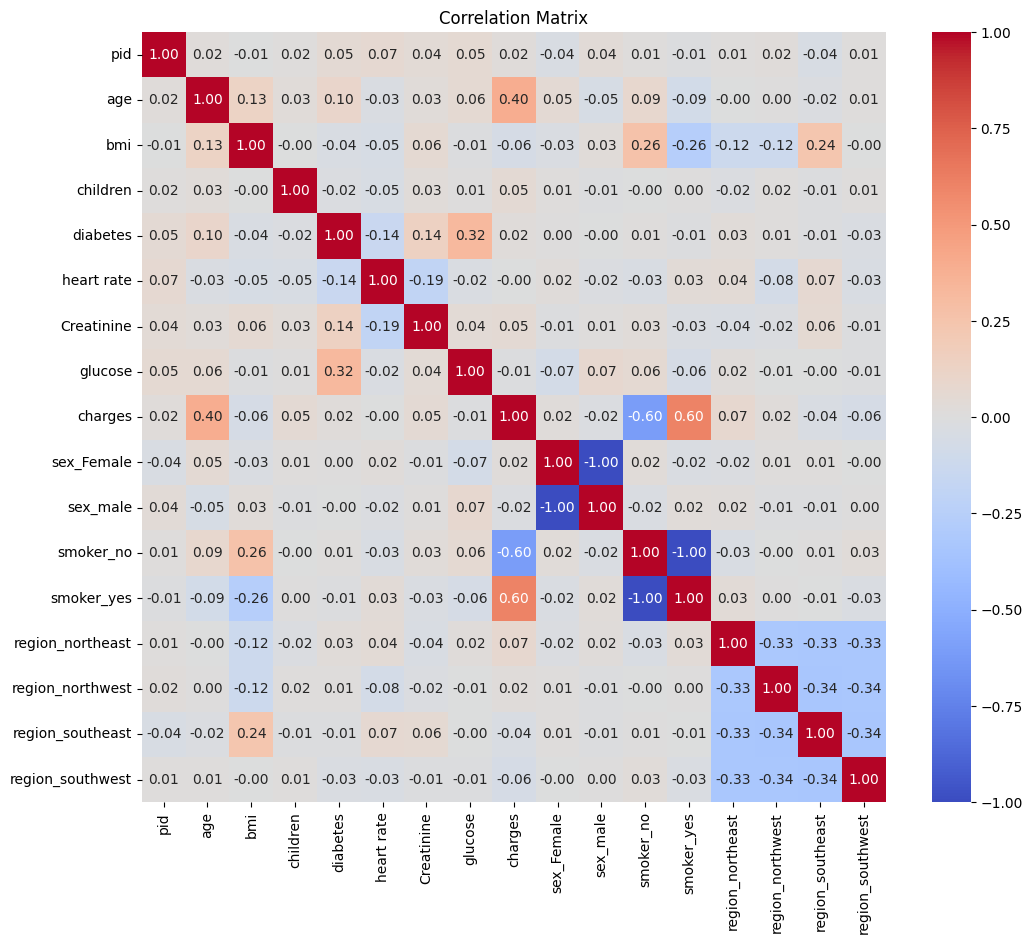

In [ ]:
# prompt: seaborn correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
Correlation_matrix = df.corr()
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**TRAIN TEST SPLIT**

In [ ]:
#Separate the fetures and target variable
x = df.drop(columns = ['charges', 'pid', 'sex_male', 'smoker_yes'], axis = 1)
y = df['charges']

In [ ]:
#Split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

**LINEAR REGRESSION**

In [ ]:
#Linear Regression model to  predict the outcome
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

#Predict the target variable for the test set
y_pred = reg.predict(x_test)

In [ ]:
y_pred

array([11494.81605439,  5286.67860715, 11510.2325615 ,  5597.96368772,
        7104.33061143, 11418.00663092,  3869.95727216, 12816.1581009 ,
       12616.05099653,  5821.12088923,  5080.54434146,  3079.14139364,
        3753.72459565,  7223.88244497,  6309.08809072,  3707.69892306,
       13488.08003495,  6346.04015102, 13266.017643  ,  7753.17794829,
        4284.83251346, 11774.27202058, 27528.50441108,  4372.22159888,
        9191.80097833,  9125.56556007, 13545.26541232,  5020.04687176,
        3621.03605272,  2781.36725529,  9736.85399796, 12220.14550258,
        7455.381135  , 13288.71740232,  9963.00843049, 11337.90220827,
        8234.33711726, 12141.11846144, 19995.40586877, 23535.98682207,
        2674.17169832, 11188.07198356,  1409.99040061,  4161.84626194,
        5217.3784809 , 13572.04108508,  8867.09449483, 19722.44466857,
       19638.37861298,  9100.90087712,  3246.41732425,  3020.5864619 ,
        4355.31889404, 11182.68708021, 12214.58488898,  5644.04127108,
      

**COMPUTING ERRORS AND FIT**

In [ ]:
#Compute the rmse, r2 score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 4908.881291904217
R2 Score: 0.5316342951865664


In [ ]:
pd.DataFrame(x.columns, reg.coef_)

,0
10965.284557,age
2530.201037,bmi
269.512990,children
-266.802083,diabetes
-1013.830114,heart rate
2437.813337,Creatinine
-213.583232,glucose
218.494318,sex_Female
-15705.105836,smoker_no
757.817181,region_northeast


In [ ]:
x_test_sample = x_test.iloc[0,:]
x_test_sample_reshaped = np.array(x_test_sample).reshape(1, -1)

In [ ]:
x_test_sample

,330
age,0.73913
bmi,0.657161
children,0
diabetes,1
heart rate,0.245409
Creatinine,0.536496
glucose,0.465555
sex_Female,False
smoker_no,True
region_northeast,False


In [ ]:
x_test_sample_reshaped

array([[0.7391304347826086, 0.6571609632446135, 0, 1, 0.2454086299583152,
        0.5364963503337951, 0.4655549480590487, False, True, False,
        False, False, True]], dtype=object)

In [ ]:
y_pred_sample = reg.predict(x_test_sample_reshaped)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred_sample

array([11494.81605439])

In [ ]:
import joblib
joblib.dump(reg, 'linear_regression_model.pk1')

['linear_regression_model.pk1']

**DASHBOARD**

In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
streamlit_code = """
import streamlit as st
import joblib
import numpy as np
import json

#Load the trained model
model = joblib.load('linear_regression_model.pk1')

#Streamlit App
st.title("Insurance Charges Prediction")
st.write("Enter the input values for prediction.")

#Input fields for each feature
age = st.number_input("Age", min_value=18, max_value=65, step=1, value=30)
bmi = st.number_input("BMI", min_value=15.0, max_value=50.0, step=0.1, value=25.0)
children = st.number_input("Number of Children", min_value=0, max_value=10, step=1, value=0)
diabetes = st.selectbox("Has Diabetes?", options=["No", "Yes"])
heart_rate = st.number_input("Heart Rate", min_value=50, max_value=120, step=1, value=75)
creatinine = st.number_input("Creatinine Level", min_value=0.0, max_value=2.0, step=0.1, value=1.0)
glucose = st.number_input("Glucose Level", min_value=50.0, max_value=300.0, step=0.1, value=100.0)

#Categorical features
sex_female = st.selectbox("Sex", options=["Male", "Female"]) == "Female"
smoker_no = st.selectbox("Smoker?", options=["No", "Yes"]) == "No"

#Region Selection
region = st.selectbox('Region', options=['Northeast', 'Northwest', 'Southeast', 'Southwest'])
region_northeast = region == 'Northeast'
region_northwest = region == 'Northwest'
region_southeast = region == 'Southeast'
region_southwest = region == 'Southwest'

#Normalization function
def min_max_scale(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

#Load Min-Max values from JSON
with open('min_max_values.json', 'r') as json_file:
    min_max_values = json.load(json_file)

#Normalize inputs
age_norm = min_max_scale(age, *min_max_values['age'])
bmi_norm = min_max_scale(bmi, *min_max_values['bmi'])
heart_rate_norm = min_max_scale(heart_rate, *min_max_values['heart rate'])
creatinine_norm = min_max_scale(creatinine, *min_max_values['Creatinine'])
glucose_norm = min_max_scale(glucose, *min_max_values['glucose'])

#Prepare input data for prediction
input_data = np.array([
  age_norm, bmi_norm, children, int(diabetes == "Yes"),
  heart_rate_norm, creatinine_norm, glucose_norm, int(sex_female), int(smoker_no), int(region_northeast),
  int(region_northwest), int(region_southeast), int(region_southwest)
]).reshape(1, -1)

#Predict button
if st.button("Predict Charges"):
 prediction = model.predict(input_data)
 st.success(f"Predicted Insurance Charges: ${prediction[0]:,.2f}")

"""

#Save the code to a file
with open ('app.py', 'w') as f:
  f.write(streamlit_code)

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2tqLvb22MSymOyQ1FsADAQCteZk_4o8ZF8P6iAnUAHipwsLaz")

In [ ]:
from pyngrok import ngrok
# expose the streamlit server running on part 8501
public_url= ngrok.connect(8501)
print(f"Streamlit App is live at:{public_url}")

Streamlit App is live at:NgrokTunnel: "https://3726-35-227-122-176.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!pkill -f ngrok